# Substitution Ciphers

In [56]:
# import modules

## Introduction

This assignment provides a **hands-on walkthrough** for **implementing encryption and decryption schemes for a substitution cipher**. It not only covers the code structure for both encryption and decryption but also includes practical tasks for decrypting ciphertext files. These tasks are designed to challenge and enhance your understanding of cryptographic concepts, making it an excellent learning opportunity for beginners in cryptography. While decrypting the ciphertext files can be challenging, especially for someone who doesn't have a prior experience, it offers valuable experience in analyzing and breaking substitution ciphers using frequency analysis and manual mapping techniques.

## Caesar Cipher

In **Caesar Cipher encryption**, we **fix a shift value** and then **shift each letter** in the plaintext by that amount in the alphabet. The result is the **Caesar-encrypted ciphertext** while keeping non-alphabetic characters unchanged.

In **Caesar Cipher decryption**, we take the encrypted ciphertext and **shift each letter backward** by the fixed shift value in the alphabet. This reverses the encryption process, restoring the original plaintext while keeping non-alphabetic characters unchanged.

### Encryption

In [ ]:
def caesar_encrypt(plaintext, shift=0):
    ''' Encrypt `plaintext` (str) as a caesar cipher with a given `shift` (int) 
    '''
    plain_text = "".join(plaintext)
    indexes = []
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    for i, letter in enumerate(plain_text):
        #print(i, letter)
        indexes.append(i)
    ciphertext = []
    for char in plain_text:
        if char in alphabet:
            original_index = alphabet.index(char)  
            new_index = (original_index + shift) % 26
            ciphertext.append(alphabet[new_index])
        else:
            ciphertext.append(char)  
    ciphertext = "".join(ciphertext)
    print("Original Text:  ", plain_text)
    print("Encrypted Text: ", ciphertext)
    return ciphertext

In [ ]:
plaintext = 'hello!' 
ciphertext = caesar_encrypt(plaintext, shift=4)

print(plaintext, '->', ciphertext) # expected output 'hello! -> lipps!'

Original Text:   hello!
Encrypted Text:  lipps!
hello! -> lipps!


### Decryption

In [ ]:
def caesar_decrypt(ciphertext, shift=0):
    ''' Decrypt `ciphertext` (str) as a caesar cipher with a given `shift` (int) 
    '''
    # code here
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    plaintext = []

    for char in ciphertext:
        if char in alphabet: 
            original_index = alphabet.index(char)
            new_index = (original_index - shift) % 26
            plaintext.append(alphabet[new_index])
        else:
            plaintext.append(char)

    plaintext = "".join(plaintext)

    # Print results
    print("Encrypted Text: ", ciphertext)
    print("Decrypted Text: ", plaintext)    
    return plaintext

In [60]:
# code snippet to test the implementation of the decryption function
ciphertext = 'lipps!' # 'hello!' encoded with shift=4
plaintext = caesar_decrypt(ciphertext, shift=4)

print(ciphertext, '->', plaintext)  # expected output 'lipps! -> hello!'

Encrypted Text:  lipps!
Decrypted Text:  hello!
lipps! -> hello!


### Ciphertext

In [61]:
# Load ciphertext
with open(file='ciphertext_caesar.txt', encoding='utf-8') as f:
    txt = f.read()
txt #just for checking whther it was correctly reading or not!

'jgew (alsdasf sfv dslaf: jges, hjgfgmfuwv [ˈjgːes] ) ak lzw ushalsd ualq gx alsdq. al ak sdkg lzw ushalsd gx lzw dsrag jwyagf, lzw uwfljw gx lzw ewljghgdalsf ualq gx jgew ushalsd, sfv s khwuasd ugemfw (emfauahsdalq) fsewv ugemfw va jges ushalsdw. oalz 2,860,009 jwkavwflk af 1,285 ce2 (496.1 ki ea), jgew ak lzw ugmfljq\'k egkl hghmdslwv ugemfw sfv lzw lzajv egkl hghmdgmk ualq af lzw wmjghwsf mfagf tq hghmdslagf oalzaf ualq daealk. lzw ewljghgdalsf ualq gx jgew, oalz s hghmdslagf gx 4,355,725 jwkavwflk, ak lzw egkl hghmdgmk ewljghgdalsf ualq af alsdq. alk ewljghgdalsf sjws ak lzw lzajv-egkl hghmdgmk oalzaf alsdq. jgew ak dguslwv af lzw uwfljsd-owklwjf hgjlagf gx lzw alsdasf hwfafkmds, oalzaf dsrag (dslame), sdgfy lzw kzgjwk gx lzw latwj nsddwq. nslausf ualq (lzw kesddwkl ugmfljq af lzw ogjdv sfv zwsvimsjlwjk gx lzw ogjdvoavw uslzgdau uzmjuz mfvwj lzw ygnwjfsfuw gx lzw zgdq kww) ak sf afvwhwfvwfl ugmfljq afkavw lzw ualq tgmfvsjawk gx jgew, lzw gfdq wpaklafy wpsehdw gx s ugmfljq oalzaf s 

### Brute Force Attack

Describe the procedure necessary to break the Caesar Cipher  
  
A brute force attack is a trial-and-error method used to crack a cryptographic system by trying all possible keys or passwords until the correct one is found.  
In our case: we can use the possible 26 shift values (English alphabets), and look for the correct decryption.

**How Does It Work**

1.  The attacker tries every possible key in the key space.
2.  Once the correct key is found, the encrypted message can be decrypted.

Since the Caesar cipher is just a shift cipher (each letter is shifted by a fixed number of places in the alphabet), there are only 25 possible keys (excluding the trivial shift of 0). This makes it highly vulnerable to brute force attacks.

In [ ]:
# code here the procedure that allows you to infer the shift value

def caesar_decrypt(ciphertext, shift):
    decrypted_text = ""
    for char in ciphertext:
        if char.isalpha():
            shift_base = ord('A') if char.isupper() else ord('a')
            decrypted_text += chr((ord(char) - shift_base - shift) % 26 + shift_base)
        else:
            decrypted_text += char  
    return decrypted_text

for shift in range(1, 26):
    print(f"Shift {shift}: {caesar_decrypt(txt, shift)}\n")


Shift 1: ifdv (zkrczre reu crkze: ifdr, gifefletvu [qifydr] ) zj kyv trgzkrc tzkp fw zkrcp. zk zj rcjf kyv trgzkrc fw kyv crqzf ivxzfe, kyv tvekiv fw kyv dvkifgfczkre tzkp fw ifdv trgzkrc, reu r jgvtzrc tfdlev (dleztzgrczkp) erdvu tfdlev uz ifdr trgzkrcv. nzky 2,860,009 ivjzuvekj ze 1,285 bd2 (496.1 jh dz), ifdv zj kyv tflekip'j dfjk gfglcrkvu tfdlev reu kyv kyziu dfjk gfglcflj tzkp ze kyv vlifgvre lezfe sp gfglcrkzfe nzkyze tzkp czdzkj. kyv dvkifgfczkre tzkp fw ifdv, nzky r gfglcrkzfe fw 4,355,725 ivjzuvekj, zj kyv dfjk gfglcflj dvkifgfczkre tzkp ze zkrcp. zkj dvkifgfczkre rivr zj kyv kyziu-dfjk gfglcflj nzkyze zkrcp. ifdv zj cftrkvu ze kyv tvekirc-nvjkvie gfikzfe fw kyv zkrczre gvezejlcr, nzkyze crqzf (crkzld), rcfex kyv jyfivj fw kyv kzsvi mrccvp. mrkztre tzkp (kyv jdrccvjk tflekip ze kyv nficu reu yvruhlrikvij fw kyv nficunzuv trkyfczt tylity leuvi kyv xfmvieretv fw kyv yfcp jvv) zj re zeuvgveuvek tflekip zejzuv kyv tzkp sfleurizvj fw ifdv, kyv fecp vozjkzex vordgcv fw r tflekip nz

In [63]:
# select the right shift and print the decrypted ciphertext

correct_shift =18

decrypted_message = caesar_decrypt(txt, correct_shift)
print(f"Decrypted Message: \n{decrypted_message}")


Decrypted Message: 
rome (italian and latin: roma, pronounced [zrohma] ) is the capital city of italy. it is also the capital of the lazio region, the centre of the metropolitan city of rome capital, and a special comune (municipality) named comune di roma capitale. with 2,860,009 residents in 1,285 km2 (496.1 sq mi), rome is the country's most populated comune and the third most populous city in the european union by population within city limits. the metropolitan city of rome, with a population of 4,355,725 residents, is the most populous metropolitan city in italy. its metropolitan area is the third-most populous within italy. rome is located in the central-western portion of the italian peninsula, within lazio (latium), along the shores of the tiber valley. vatican city (the smallest country in the world and headquarters of the worldwide catholic church under the governance of the holy see) is an independent country inside the city boundaries of rome, the only existing example of a

## Simple Substitution Cipher

Brief explanation of a Simple Substitution Cipher  
  
A **Simple Substituion cipher** are the one in which the plaintext character is replaced with a different cipher text symbol or by some shift value. The receivers deciphers the text by performing the inverse substituion.  

**Examples:**  
1. **Caesar Cipher** – Shifts letters by a fixed amount (e.g., A → D for shift 3).  
2. **Atbash Cipher** – Reverses the alphabet (e.g., A → Z, B → Y).  

**Weaknesses:**  
- **Brute force attacks** (especially for Caesar, only 25 shifts).  
- **Frequency analysis** reveals patterns since letter frequencies remain unchanged.  

### Encryption

In [64]:
def substitution_encrypt(plaintext, mapping):
    ''' Encrypt `ciphertext` (str) as a simple substitution cipher with a given 
        `mapping` (??) from plaintext letters to ciphertext letters '''
    # code here
    ciphertext = ''
    for char in plaintext:
        if char in mapping:
            ciphertext += mapping[char]
        else:
            ciphertext += char
    return ciphertext

In [65]:
# code snippet to test the implementation of the encryption function
plaintext = 'hello!'
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'} 

ciphertext = substitution_encrypt(plaintext, mapping)

print(plaintext, '->', ciphertext) # expected output 'hello! -> apwwq!'

hello! -> apwwq!


### Decryption

In [ ]:
def substitution_decrypt(ciphertext, mapping):
    ''' Decrypt `ciphertext` (str) as a simple substitution cipher with a given 
       `mapping` (dict) from plaintext letters to ciphertext letters '''
    # code here
    reverse_mapping = {v: k for k, v in mapping.items()}
    plaintext = ''
    for char in ciphertext:
        if char in reverse_mapping:
            plaintext += reverse_mapping[char]
        else:
            plaintext +=char
    return plaintext

In [67]:
# code snippet to test the implementation of the decryption function
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}  # previous mapping 
ciphertext = 'apwwq!'

plaintext = substitution_decrypt(ciphertext, mapping)

print(ciphertext, '->', plaintext)  # expected output 'apwwq! -> hello!'

apwwq! -> hello!


### Ciphertext

In [68]:
# Load ciphertext
with open(file='ciphertext_simple.txt', encoding='utf-8') as f:
    txt = f.read()

### Frequency Analysis Attack

Describe the procedure to break a Simple Substitution Cipher  
**Frequency Analysis Attack on a Simple Substitution Cipher**  
1. Collect Ciphertext: Gather a long enough ciphertext for analysis.  
2. Analyze Frequencies: Count how often each letter appears.  
3. Compare with Language: Match ciphertext frequencies to common letter frequencies in the target language (e.g., E, T, A in English).  
4. Guess Mappings: Assign the most frequent ciphertext letters to common plaintext letters (e.g., E, T).  
5. Identify Patterns: Look for common words (e.g., "the") to confirm guesses.  
6. Decrypt: Use the mappings to decrypt the ciphertext.  
7. Verify: Adjust mappings if the decrypted text doesn’t make sense.

#### English Letters Distribution

In [ ]:
# function to infer the letter distribution from a text
def letter_distribution(text):
    ''' Return the `distribution` (??) of the letters in `text` (str) '''
    # code here
    text = ''.join([char.lower() for char in text if char.isalpha()])
    total_letters =len(text)
    distribution =  {}
    for char in text:
        if char in distribution:
            distribution[char] += 1
        else:
            distribution[char] = 1
    
    for char in distribution:
        distribution[char] = distribution[char] / total_letters
    return distribution   

In [70]:
# code snippet to test the implementation of `letter_distribution`
text = 'hello world!'

letter_distribution(text)
# expected ouput: 
# {'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1, ...}

{'h': 0.1, 'e': 0.1, 'l': 0.3, 'o': 0.2, 'w': 0.1, 'r': 0.1, 'd': 0.1}

In [71]:
# load text
# Load ciphertext
with open(file='wikipedia_cybersecurity.txt', encoding='utf-8') as f:
    wiki_txt = f.read()

In [72]:
# estimate the English letters distribution 
letter_distribution(wiki_txt)

{'c': 0.049220181770580095,
 'o': 0.07128698058869731,
 'm': 0.026729500941267408,
 'p': 0.02296443131241351,
 'u': 0.02767700190746905,
 't': 0.09365299023824662,
 'e': 0.12123025520190497,
 'r': 0.06936704442034135,
 's': 0.07490244480183517,
 'i': 0.07760780940270037,
 'y': 0.01921182880153595,
 'a': 0.08335515078979193,
 'l': 0.03511987133934248,
 'b': 0.014137711785166623,
 'd': 0.034820660507910384,
 'g': 0.01828926207128698,
 'n': 0.0730199099874082,
 'f': 0.020134395531784918,
 'h': 0.031479472890251964,
 'w': 0.011370011594419718,
 'k': 0.008315567690217053,
 'z': 0.0014711199212078144,
 'v': 0.011482215656206754,
 'x': 0.0015957911009711885,
 'q': 0.0006233558988168705,
 'j': 0.0008726982583436187,
 'ó': 3.740135392901223e-05,
 'à': 1.246711797633741e-05,
 'ś': 1.246711797633741e-05}

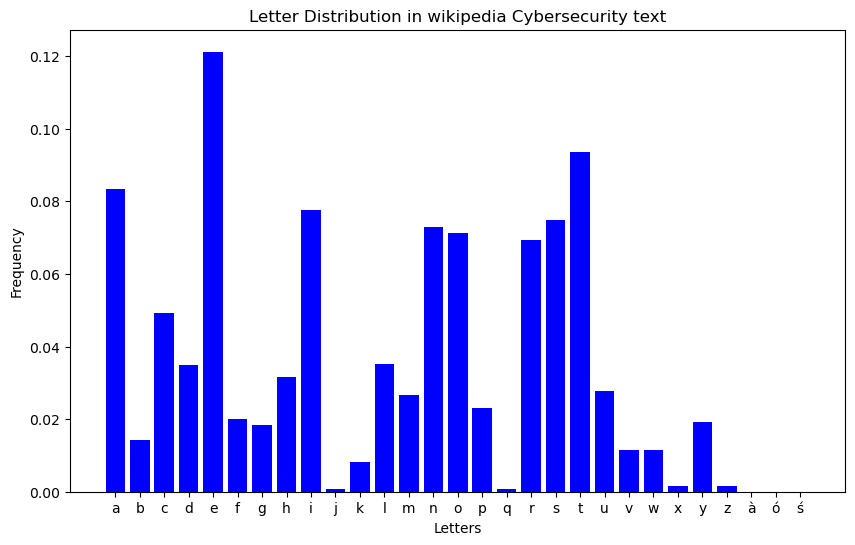

In [ ]:
# plot the English letter distribution
import matplotlib.pyplot as plt

dist = letter_distribution(wiki_txt)
letters = sorted(dist.keys())
frequencies = [dist[letter] for letter in letters]

plt.figure(figsize=(10, 6))
plt.bar(letters, frequencies, color='blue')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Letter Distribution in wikipedia Cybersecurity text')
plt.show()

In [74]:
# store the distribution as a pickle file
import pickle
with open('English_letter_distribution.pkl', 'wb') as f:
    pickle.dump(dist, f)

#### Perform attack

In [ ]:
# perform Frequency analysis attack
from collections import defaultdict

# Load ciphertext
with open(file='ciphertext_simple.txt', encoding='utf-8') as f:
    ciphertext = f.read()

cipher_dist = letter_distribution(ciphertext)
with open('English_letter_distribution.pkl', 'rb') as f:
    english_dist = pickle.load(f)
sorted_cipher = sorted(cipher_dist.items(), key=lambda x: x[1], reverse=True)
sorted_english = sorted(english_dist.items(), key=lambda x: x[1], reverse=True)
mapping = {}
for (cipher_char, _), (english_char, _) in zip(sorted_cipher, sorted_english):
    mapping[cipher_char] = english_char
mapping['m'] = 'e'  
mapping['x'] = 'u' 
mapping['g'] = 't'  
mapping['b'] = 'a'  
mapping['v'] = 'i'  
mapping['l'] = 's'  
mapping['f'] = 'n'  
mapping['s'] = 'r'  
mapping['d'] = 'o'
mapping['c'] = 'h'
mapping['j'] = 'd' 
mapping['w'] = 'l'  
mapping['u'] = 'w' 
mapping['a'] = 'v' 
mapping['p'] = 'c' 
mapping['y'] = 'p'
mapping['k'] = 'm'
mapping['o'] = 'b'
mapping['t'] = 'g'
mapping['r'] = 'f'  
mapping['e'] = 'y'
mapping['n'] = 'x'  
mapping['h'] = 'q'  
mapping['i'] = 'z'  
mapping['è'] = 'q'  
mapping['z'] = 'ò'  
mapping['é'] = 'à'  
mapping['ñ'] = 'ś'   
# Print the updated mapping
print("\nUpdated Mapping of Ciphertext Letters to Plaintext Letters:")
for cipher_char, english_char in mapping.items():
    print(f"{cipher_char} -> {english_char}")
decrypted_text = []
for char in ciphertext:
    if char.lower() in mapping:
        decrypted_text.append(mapping[char.lower()])
    else:
        decrypted_text.append(char) 

decrypted_text = ''.join(decrypted_text)



Updated Mapping of Ciphertext Letters to Plaintext Letters:
m -> e
g -> t
b -> a
v -> i
l -> s
f -> n
s -> r
d -> o
c -> h
w -> l
p -> c
j -> d
y -> p
x -> u
k -> m
o -> b
r -> f
e -> y
t -> g
u -> w
a -> v
q -> k
n -> x
h -> q
i -> z
è -> q
z -> ò
é -> à
ñ -> ś


In [ ]:
# print mapping
print("Mapping of ciphertext letters to plaintext letters:")
for cipher_char, english_char in mapping.items():
    print(f"{cipher_char} -> {english_char}")
decrypted_text = []
for char in ciphertext:
    if char.lower() in mapping:
        decrypted_text.append(mapping[char.lower()])
    else:
        decrypted_text.append(char)

decrypted_text = ''.join(decrypted_text)

Mapping of ciphertext letters to plaintext letters:
m -> e
g -> t
b -> a
v -> i
l -> s
f -> n
s -> r
d -> o
c -> h
w -> l
p -> c
j -> d
y -> p
x -> u
k -> m
o -> b
r -> f
e -> y
t -> g
u -> w
a -> v
q -> k
n -> x
h -> q
i -> z
è -> q
z -> ò
é -> à
ñ -> ś


In [77]:
# print decrypted plaintext
print("\nDecrypted Plaintext:")
print(decrypted_text)


Decrypted Plaintext:
in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.
substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sequence in the ciphertext, but the units themselves are altered.
there are a number of different types of substitution cipher. if the cipher operates on single letters, it is termed a simple substitution cipher; a cipher that operates on larger g

## Conclusion

This assignment serves as a comprehensive introduction to classical cryptography, combining theoretical knowledge with practical application. It is particularly valuable for beginners, offering a structured yet challenging pathway to understanding encryption, decryption, and cryptographic analysis.  
**Conclusive Remark:** While substitution ciphers are relatively straightforward to decrypt using frequency analysis, the process often requires a trial-and-error approach to accurately map ciphertext letters to their corresponding plaintext letters. This iterative process highlights the importance of pattern recognition, critical thinking, and manual intervention in cryptographic analysis, even for seemingly simple encryption methods.